In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
import os

SESSION = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']
COLUMNS = ["NaN", "NaN.1", "NaN.2", "NaN.3", "NaN.4", "NaN.5", "NaN.6",
           "NaN.7", "NaN.8", "NaN.9", "NaN.10", "NaN.11", "NaN.12"]

One or more files are already structured. Did not structure any file.
Average movement 8053


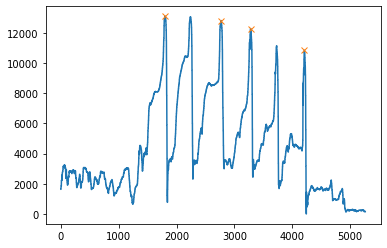

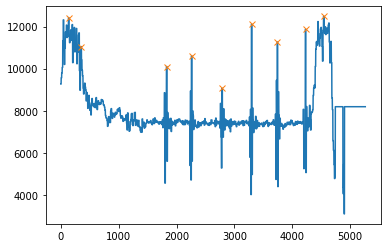

Peaks found: [1804, 2772, 3282, 4212]


IndexError: list index out of range

In [500]:
_structure_txt(5)

# Convert the new csv files to pd dataframes
session1 = pd.read_csv(SESSION[0])
session2 = pd.read_csv(SESSION[1])
session3 = pd.read_csv(SESSION[2])
session4 = pd.read_csv(SESSION[3])
session5 = pd.read_csv(SESSION[4])

# Remove excess columns is this even nessecary
session1 = session1.drop(columns=COLUMNS)
session2 = session2.drop(columns=COLUMNS)
session3 = session3.drop(columns=COLUMNS)
session4 = session4.drop(columns=COLUMNS)
session5 = session5.drop(columns=COLUMNS)


#session1 = _imputate([1714, 6772, 13117, 19675], [3516, 8859, 14262, 19701], 25507, 29250, session1, 4)
#_remove_sixth(session2, 4000)
#session_avg_time = _imputate_time(4, session1, session3, session4, session5)
#session2 = _insert_imputation_p7(session_avg_time, session2, 5170)
#_insert_imputation_p10(session2, 3, 0, 4985, 6201, 7000)
#_insert_imputation_p10(session4, 3, 1, 4784, 5943, 7235)     
#_insert_imputation_p10(session5, 5, 2, 2205, 4536, 5644, 7179, 9163)  


#impulse1 = _extract_impulse(session1)     
impulse2 = _extract_impulse(session2)
#impulse3 = _extract_impulse(session3)
#impulse4 = _extract_impulse(session4)
#impulse5 = _extract_impulse(session5)


print("\n\n\n_________________________________________________________________")
print("                   Impulse for this participant:\n", impulse1, "\n",
                          impulse2, "\n", impulse3, "\n", impulse4, "\n", impulse5)
print("_________________________________________________________________")

# Change the name participant_x for each file.
# e.g participant_2.txt, participant_3.txt

# PARTICIPANT_NAME = "participant_11.txt"
# with open(PARTICIPANT_NAME, 'w') as txt:
#     txt.write("[")
#     txt.write(str(impulse1))
#     txt.write(", ")
#     txt.write(str(impulse2))
#     txt.write(", ")
#     txt.write(str(impulse3))
#     txt.write(", ")
#     txt.write(str(impulse4))
#     txt.write(", ")
#     txt.write(str(impulse5))
#     txt.write("]")        
# impulse1 = 0
# impulse2 = 0
# impulse3 = 0
# impulse4 = 0
# impulse5 = 0
    



In [482]:
# "Global variables"
RANGE = 100 
INDEX_RANGE = 1000
    
MOVE_DISTANCE = 200
FORCE_DISTANCE = 500
    
MOVE_HEIGHT = 9000 #average_movement + 2000
FORCE_HEIGHT = 10000 #average_force + 1000

# "Global variables"
#RANGE = 50 
#INDEX_RANGE = 1000

#MOVE_DISTANCE = 800
#FORCE_DISTANCE = 800
    
#MOVE_HEIGHT = 1000 #average_movement + 2000
#FORCE_HEIGHT = 8000 #average_force + 1000

def _insert_imputation_p10(session_x, num, ix, interval_x1=None, interval_x2=None, interval_x3=None, interval_x4=None, interval_x5=None):
    force_lst = session_x['force'].tolist()
    
    #Imputation values for participant 10.
    imputation_value = [13496, 12008, 10856]
    
    if num == 1:
        force_lst[interval_x1] = imputation_value[ix]
    if num == 2:
        force_lst[interval_x1] = imputation_value[ix]
        force_lst[interval_x2] = imputation_value[ix]
    if num == 3:
        force_lst[interval_x1] = imputation_value[ix]
        force_lst[interval_x2] = imputation_value[ix]
        force_lst[interval_x3] = imputation_value[ix]
    if num == 4:
        force_lst[interval_x1] = imputation_value[ix]
        force_lst[interval_x2] = imputation_value[ix]
        force_lst[interval_x3] = imputation_value[ix]
        force_lst[interval_x4] = imputation_value[ix]
    if num == 5:
        force_lst[interval_x1] = imputation_value[ix]
        force_lst[interval_x2] = imputation_value[ix]
        force_lst[interval_x3] = imputation_value[ix]
        force_lst[interval_x4] = imputation_value[ix]
        force_lst[interval_x5] = imputation_value[ix]
        
    session_x['force'] = force_lst
    return session_x  

def _insert_imputation_p7(time, session_to_imputate, peak):
    force_lst = session_to_imputate['force'].tolist()
    time_lst = session_to_imputate['time'].tolist()
    
    #Imputated value (different for each session/shot)
    #Taking the average value of the 4 other shots.
    force_lst[peak] = 9363
    peak_time = time_lst[peak]
    time = time * 1000

    for ix in range(0, len(time_lst)):
        if time_lst[ix] >= time_lst[peak] - time:
            slope_start = ix
            break
            
    for ix in range(ix, peak):
        force_lst[ix] = sum(force_lst) / len(force_lst)

    session_to_imputate['force'] = force_lst
    return session_to_imputate

def _imputate_time(num, session_x1=None, session_x2=None, session_x3=None, session_x4=None):
    
    avg_time = []
    
    if num == 1:
        avg_time.append(_extract_impulse_time(session_x1))
    if num == 2:
        avg_time.append(_extract_impulse_time(session_x1))
        avg_time.append(_extract_impulse_time(session_x2))
    if num == 3:
        avg_time.append(_extract_impulse_time(session_x1))
        avg_time.append(_extract_impulse_time(session_x2))
        avg_time.append(_extract_impulse_time(session_x3))
    if num == 4:
        avg_time.append(_extract_impulse_time(session_x1))
        avg_time.append(_extract_impulse_time(session_x2))
        avg_time.append(_extract_impulse_time(session_x3))
        avg_time.append(_extract_impulse_time(session_x4))
        
    average_time = 0
    for ix in range(0, num):
        average_time += sum(avg_time[ix]) / 5
    average_time = average_time / 5

    return average_time

def _extract_impulse(session):
    if session is None:
        print("Error, _extract_impulse requires atleast one pandas dataframe")
        return
    
    average_movement = int(session['acc'].mean())
    average_force    = int(session['force'].mean())
    print("Average movement", average_movement)

    force_lst = session['force'].tolist()
    move_lst  = session['acc'].tolist()
    time_lst  = session['time'].tolist()
    
    movement  = np.array(move_lst)
    force     = np.array(force_lst)
    
    move_peaks, _  = find_peaks(movement, height=(MOVE_HEIGHT), distance = MOVE_DISTANCE) 
    force_peaks, _ = find_peaks(force, height=(FORCE_HEIGHT), distance = FORCE_DISTANCE)
    
    #-------- Testing starting --------
    plt.plot(force)
    plt.plot(force_peaks, force[force_peaks], "x")
    plt.show()
    
    plt.plot(movement)
    plt.plot(move_peaks, movement[move_peaks], "x")
    #print("Force Peaks identified:", force_peaks)
    #print("Move Peaks identified:", move_peaks)
    plt.show()
  
    #plt.plot(movement)
    #plt.plot(move_peaks, movement[move_peaks], "x")
    #print("New Movement Peaks identified:", move_peaks)
    #plt.show()
    #-------- Testing finished --------

    move_index  = move_peaks.tolist()
    force_index = force_peaks.tolist()
              
            
    indexCnt = 0
    force_maxIndex, time_maxIndex = [], []
    for ix in range(0, len(move_index)):
        for ixx in range(indexCnt, len(force_index)):
            if force_index[ixx] in range(move_index[ix] - RANGE, move_index[ix] + RANGE):
                force_maxIndex.append(force_index[ixx])
                time_maxIndex.append(force_index[ixx])
                indexCnt = ixx + 1
                break
    
    #-------- Testing starting --------
    print("Peaks found:", force_maxIndex)
    #-------- Testing finished --------      
    
    
    #-------- Testing starting --------
    #print("Lowest pressure", lowest_pressure)
    #-------- Testing finished --------     
    
    force_minIndex, time_minIndex = [], []
    for ix in range(0, 5):
        min_index = _find_slope_start(force_maxIndex[ix], force_lst, average_force)
        if min_index == False:
            print("Error finding slope start for shot")
            return 
        force_minIndex.append(min_index)
        time_minIndex.append(min_index) 
    
    
    #-------- Lowest Pressure --------
#     lowest_pressure = 0
#     for ix in range(0, 5):
#         for ixx in range(force_maxIndex[ix] + 500, force_maxIndex[ix] + 2000):
#             lowest_pressure += force_lst[ixx]
#     lowest_pressure = lowest_pressure / 7500
#     print("Lowest_pressure", lowest_pressure)
    
    #-------- Lowest Pressure --------    
    
    #-------- Testing starting --------
    print("Slope start", force_minIndex)
    #for i in range(0, 5):
    #    print("Time of slope starts", round(time_lst[time_minIndex[i]], 2))
    #-------- Testing finished --------
    #-------- Testing starting --------
    print("Actual shots found", force_maxIndex)
    #for i in range(0, 5):
    #    print("Time of these shots", round(time_lst[time_maxIndex[i]], 2))
    #-------- Testing finished --------

    if len(force_maxIndex) > 5:
        print("Found too many shots. Try adjusting index interval or distance of peaks")
        return
    
    force_max, force_min, time_max, time_min = [], [], [], []
    for ix in range(0, 5):
        force_max.append(force_lst[force_maxIndex[ix]])# - lowest_pressure)
        time_max.append(int(time_lst[time_maxIndex[ix]]))
        force_min.append(force_lst[force_minIndex[ix]])# - lowest_pressure)
        time_min.append(int(time_lst[time_minIndex[ix]]))

    
    t1, t2 = [], []
    for i in range(0, 5):
        t1.append(round(time_min[i] / 1000, 2))
        t2.append(round(time_max[i] / 1000, 2))   
    force_average = _convert_newton(force_min, force_max)
    impulse = _calculate_impulse(t1, t2, force_average)
    
    impulse_return = 0
    for ix in range(0, 5):
        impulse_return += impulse[ix]
        #print("t1", t1[ix])
        #print("t2", t2[ix])

    impulse_return = impulse_return / 5
    
    return int(impulse_return)


def _remove_sixth(session, index):
    
    force_lst = session['force'].tolist()
    move_lst = session['acc'].tolist()
    
    del force_lst[index:-1]
    del move_lst[index:-1]

    force_lst = pd.DataFrame(force_lst)
    move_lst = pd.DataFrame(move_lst)
    
    session['acc'] = move_lst
    session['force'] = force_lst    
    return session
    

def _imputate(inter1, inter2, imp_inter1, imp_inter2, session, num_times):

    force_lst = session['force'].tolist()
    
    force_to_imputate = session.iloc[imp_inter1:imp_inter2]
    force_to_imputate = force_to_imputate['force']
    
    #Select all the values between the given intervals and set them to None
    for i in range(0, num_times):
        for ix in range(inter1[i], inter2[i]):
            force_lst[ix] = None
      
    listSkott = [13234, 12413, 13451, 12354]
    for ix in range(0, num_times):
        force_lst[inter2[ix]] = listSkott[ix]
        
    force_lst = pd.DataFrame(force_lst)
    
    #Percent of values that have to be imputated.
    print("Percentage null values", force_lst.isnull().sum() / len(force_lst))    
    
    force_lst.fillna(force_to_imputate.mean(), inplace=True)

    session['force'] = force_lst
    
    return session

"""
_structure_txt transforms the text file generated from the 
Infusion Systems software (insert name) and replaces the blankspaces 
with commas and adds column names.

Parameter:
    - The number of files to be structured.

Note:
    - _structure_txt uses the global list 'SESSION'. Add the names of the
    text files you want to structure to that list to include them.
"""
def _structure_txt(number_of_files):
    exit = False
    if number_of_files is 0:
        print("There are no files to structure.")
        return
    for i in range(0, number_of_files):
        with open(SESSION[i], 'r') as data:
            txt = data.read()
            if 'time' in txt:
                exit = True
    if exit is True:
        print("One or more files are already structured. Did not structure any file.")
        return
    
    for i in range(0, number_of_files):
        with open(SESSION[i], 'r') as data:
            txt = data.read()
        txt = txt.replace(' ', ',')

        with open(SESSION[i], 'w') as add_column:
            add_column.write('time,acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,force,NaN,NaN,NaN,NaN,NaN\n')

        with open(SESSION[i], 'a') as append:
            append.write(txt)
    print('Files structured successfully.')
    
    
"""
_plot_session plots the session selected and it shows the y-axis 
movement and force.

Parameters:
    - pandas DataFrame, more specifically a pd with data structured 
    with the _structure_txt function. 
"""
def _plot_session(session):
    movement = session.iloc[:, 1]
    force = session.iloc[:, 2]
    movement.plot()
    force.plot()
    plt.show()


"""
_convert_newton takes the minimum force (when the pressure starts to increase)
and maximum force (the peak of the curve) and converts it to newton. 
This is needed since the data provided by the Infusion Systems software
is a 14 bit integer.

Parameters:
    - _convert_newton takes two lists of size 5 containing minimum- and maximum force
    
Returns:
    - a list of size 5.
    
@TODO Ta bort print kommentarerna och snygga till variabel namn.
"""
def _convert_newton(min_force, max_force):
    force = 0
    total_force = []
    newton_force = []
    percentage = 0
    
    for ix in range(0, 5):
        force = min_force[ix] + max_force[ix]
        total_force.append(force / 2)
    
    for ixx in range(0, 5):
        percentage = total_force[ixx]
        percentage = percentage / 16384
        newton_force.append(percentage * 98)
        #print("Newton force after conversion to N", newton_force[ixx])
    return newton_force


"""
_find_slope_start attempts to find the point the pressure is starting to increase.

Parameters:
    - The index of where to begin (ex. the peak of the curve).
    - A list of which to scan (undefined size)
    - Average value of the list

Returns:
    - the index of the list (parameter 2) where the pressure is starting to increase.
"""
def _find_slope_start(ix, lst, average_force):
    for ixx in range(ix, 0, -1):
        if lst[ixx] < average_force - 700 and lst[ixx] < lst[ix]:
                return ixx
    print("Error finding start of the slope.")
    return False


"""
_calculate_impulse calculates the impulse given the parameters 
time and force.

Parameters:
    - _calculate_impulse takes two lists of size 5 containing 
    time and force.
    
Returns:
    - a list of size 5.
"""
def _calculate_impulse(t1, t2, force):
    impulse = []
    for ix in range(0, 5):
        impulse.append((force[ix] * (t2[ix] - t1[ix])))
       # print("Time between initial force and final force", (t2[ix] - t1[ix]))
    return impulse



def _extract_impulse_time(session):
    if session is None:
        print("Error, _extract_impulse requires atleast one pandas dataframe")
        return
    
    average_movement = int(session['acc'].mean())
    average_force    = int(session['force'].mean())
    #print("Average movement", average_movement)
    
    force_lst = session['force'].tolist()
    move_lst  = session['acc'].tolist()
    time_lst  = session['time'].tolist()
    
    movement  = np.array(move_lst)
    force     = np.array(force_lst)
    

    move_peaks, _  = find_peaks(movement, height=(MOVE_HEIGHT), distance = MOVE_DISTANCE) 
    force_peaks, _ = find_peaks(force, height=(FORCE_HEIGHT), distance = FORCE_DISTANCE)
    
    
    #-------- Testing starting --------
#     plt.plot(force)
#     plt.plot(force_peaks, force[force_peaks], "x")
#     plt.show()
    
#     plt.plot(movement)
#     plt.plot(move_peaks, movement[move_peaks], "x")
#     plt.show()
  
    #plt.plot(movement)
    #plt.plot(move_peaks, movement[move_peaks], "x")
    #print("New Movement Peaks identified:", move_peaks)
    #plt.show()
    #-------- Testing finished --------

    move_index  = move_peaks.tolist()
    force_index = force_peaks.tolist()
              
            
    indexCnt = 0
    force_maxIndex, time_maxIndex = [], []
    for ix in range(0, len(move_index)):
        for ixx in range(indexCnt, len(force_index)):
            if force_index[ixx] in range(move_index[ix] - RANGE, move_index[ix] + RANGE):
                force_maxIndex.append(force_index[ixx])
                time_maxIndex.append(force_index[ixx])
                indexCnt = ixx + 1
                break
    
    
    #-------- Testing starting --------
    #print("Peaks found:", force_maxIndex)
    #-------- Testing finished --------      
    
    
    #-------- Testing starting --------
    #print("Lowest pressure", lowest_pressure)
    #-------- Testing finished --------     
    
    force_minIndex, time_minIndex = [], []
    for ix in range(0, 5):
        min_index = _find_slope_start(force_maxIndex[ix], force_lst, average_force)
        if min_index == False:
            print("Error finding slope start for shot")
            return 
        force_minIndex.append(min_index)
        time_minIndex.append(min_index) 
    
    
    #-------- Lowest Pressure --------
#     lowest_pressure = 0
#     for ix in range(0, 5):
#         for ixx in range(force_maxIndex[ix] + 500, force_maxIndex[ix] + 2000):
#             lowest_pressure += force_lst[ixx]
#     lowest_pressure = lowest_pressure / 7500
#     print("Lowest_pressure", lowest_pressure)
    
    #-------- Lowest Pressure --------    
    
    #-------- Testing starting --------
    #print("Slope start", force_minIndex)
    #for i in range(0, 5):
    #    print("Time of slope starts", round(time_lst[time_minIndex[i]], 2))
    #-------- Testing finished --------
    #-------- Testing starting --------
    #print("Actual shots found", force_maxIndex)
    #for i in range(0, 5):
    #    print("Time of these shots", round(time_lst[time_maxIndex[i]], 2))
    #-------- Testing finished --------

    if len(force_maxIndex) > 5:
        print("Found too many shots. Try adjusting index interval or distance of peaks")
        return
    
    force_max, force_min, time_max, time_min = [], [], [], []
    for ix in range(0, 5):
        force_max.append(force_lst[force_maxIndex[ix]])# - lowest_pressure)
        time_max.append(int(time_lst[time_maxIndex[ix]]))
        force_min.append(force_lst[force_minIndex[ix]])# - lowest_pressure)
        time_min.append(int(time_lst[time_minIndex[ix]]))

    
    t1, t2 = [], []
    for i in range(0, 5):
        t1.append(round(time_min[i] / 1000, 2))
        t2.append(round(time_max[i] / 1000, 2))  
        
    force_average = _convert_newton(force_min, force_max)
    impulse = _calculate_impulse(t1, t2, force_average)
    
    impulse_return = 0
    for ix in range(0, 5):
        impulse_return += impulse[ix]
        #print("t1", t1[ix])
        #print("t2", t2[ix])

    impulse_return = impulse_return / 5
    
    avg_time = []
    for ix in range(0, 5):
        avg_time.append((t2[ix] - t1[ix]))
    
    #print("AVG_TIME", avg_time)
    
    return avg_time
